In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# 7/3 の受講者別カード別詳細

## DF一覧
* df2・・・7/3コンテンツと、7/3時点のステータスをマージしたもの。学習回数１回のみ。
* df_total2・・・同上＋全ての学習回数込み。
* df_m・・・df2のうち、7/3【必須】のみ
* df_a・・・df2のうち、7/3【任意】のみ
* df_totalm・・・df_total2のうち、7/3【必須】のみ
* df_totala ・・・df_total2のうち、7/3【任意】のみ
* df_mdone・・・df_mのうち、最後のカードを抽出

In [2]:
df=pd.read_csv('0703_UserCoursedtl_20171214.csv', header=1, parse_dates=True)

In [3]:
columns = ['LOGINID', 'カードコード','表示開始日時','受講回（回目）','学習開始日時','学習終了日時','学習時間']

# 1回目の受講に絞り、事務局の人を外す
first = df['受講回（回目）'] ==1
non_adm = df['所属組織'] !='事務局'

# 1回目の受講のDataframeと全ての学習を含めたDataframe
df1=df.loc[:, columns][(first)&(non_adm)]
df_total=df.loc[:, columns][(non_adm)]

# columns の名称変更
df1.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']
df_total.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']

In [4]:
# datetimeの設定
df1['end'] = pd.to_datetime(df1['end'])
df1['start'] = pd.to_datetime(df1['start'])
df1['study_time'] = pd.to_datetime(df1['study_time'])
df1['study_time'] = df1['study_time'].dt.hour*3600 + df1['study_time'].dt.minute*60 + df1['study_time'].dt.second
df1['study_time'] = pd.to_numeric(df1['study_time'])
df1['release'] = pd.to_datetime(df1['release'])

df_total['end'] = pd.to_datetime(df_total['end'])
df_total['start'] = pd.to_datetime(df_total['start'])
df_total['study_time'] = pd.to_datetime(df_total['study_time'])
df_total['study_time'] = df_total['study_time'].dt.hour*3600 + df_total['study_time'].dt.minute*60 + df_total['study_time'].dt.second
df_total['study_time'] = pd.to_numeric(df_total['study_time'])
df_total['release'] = pd.to_datetime(df_total['release'])

# 並び替え
df1 = df1[['LOGINID', 'card_code','times','release','start','end','study_time']]
df_total = df_total[['LOGINID', 'card_code','times','release','start','end','study_time']]

# NaNを前と同じ値になるように修正
df1.fillna(method='ffill', inplace = True)
df_total.fillna(method='ffill', inplace = True)

In [5]:
# リリースからカード修了までの時間
df1['rel_end_days'] = df1['end'] - df1['release']
df_total['rel_end_days'] = df_total['end'] - df_total['release']

df1['rel_end_days']=df1['rel_end_days'].dt.days
df_total['rel_end_days']=df_total['rel_end_days'].dt.days

In [6]:
# 7/3からいるメンバーを取ってくる
df_org = pd.read_csv('20170703_original_1.csv')

# columns の名称変更 
df_org.columns = ['LOGINID', 'status']

# df1とdf_orgのマージ
# データのタイプをstringに統一
df_org['LOGINID'] = df_org['LOGINID'].astype(str)

#タイプの合致確認用
#print(df1.dtypes)
#print(df_org.dtypes)

df2 = pd.merge(df1,df_org, how='left')
df_total2 = pd.merge(df_total,df_org, how='left')

In [7]:
# statusがm0703の人（7月3日から必須でいる人）を抽出
# ７月３日から必須：df_m, 任意：df_a
org_mand = df2['status'] == 'm0703'
org_arb = df2['status'] == '703'
df_m = df2.loc[org_mand]
df_a = df2[org_arb]

org_totalmand = df_total2['status'] == 'm0703'
org_totalarb = df_total2['status'] == '703'
df_totalm = df_total2.loc[org_totalmand]
df_totala = df_total2[org_totalarb]

In [79]:
# 最後のカード（card_code == 111093） を取ってくる　→maxのカードを取ってくる？
done = df_m['card_code'] == 111093
df_mdone = df_m[done]

donea = df_a['card_code'] == 111093
df_adone = df_a[donea]

# 最後のカードまで辿り着いた人の数
print(len(df_mdone.index))
print(len(df_adone.index))

2258
345


## ここから分析

In [9]:
# 当初からいるメンバーの人数
len(df_m['LOGINID'].unique())

2259

In [10]:
# カードごとの違い 必須対象者と任意の違い
#print(df_totalm.groupby('card_code')['study_time'].mean())
#print(df_totala.groupby('card_code')['study_time'].mean())

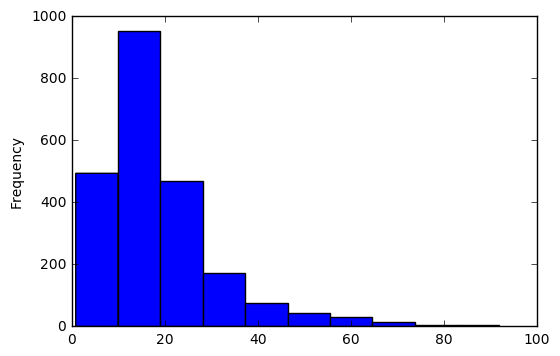

In [14]:
study_time = df_m.groupby('LOGINID')['study_time'].sum()/60
study_time.plot(kind='hist')
plt.show()

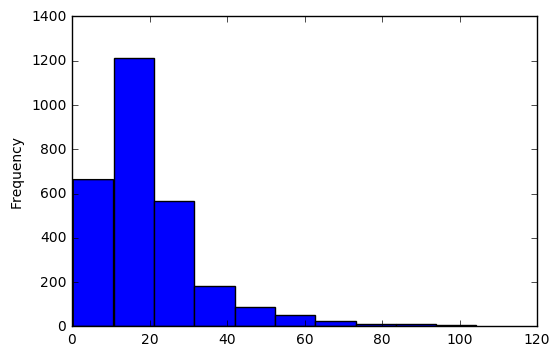

In [15]:
total_study_time = df_total.groupby('LOGINID')['study_time'].sum()/60
total_study_time.plot(kind='hist')
plt.show()

# 9/4 の受講者別カード別詳細

In [20]:
df941=pd.read_csv('0904_UserCoursedtl_20171221.csv', header=1, parse_dates=True)

In [21]:
columns94 = ['ログインID', 'カードコード','表示開始日時','受講回（回目）','学習開始日時','学習終了日時','学習時間']

# 1回目の受講に絞り、事務局の人を外す条件
first94 = df941['受講回（回目）'] ==1
non_adm94 = df941['所属組織'] !='事務局'

# 1回目の受講のDataframeと全ての学習を含めたDataframe
df94=df941.loc[:, columns94][(first94)&(non_adm94)]
df94_total=df941.loc[:, columns94][(non_adm94)]

# columns の名称変更
df94.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']
df94_total.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']

In [22]:
# datetimeの設定
df94['end'] = pd.to_datetime(df94['end'])
df94['start'] = pd.to_datetime(df94['start'])
df94['study_time'] = pd.to_datetime(df94['study_time'])
df94['study_time'] = df94['study_time'].dt.hour*3600 + df94['study_time'].dt.minute*60 + df94['study_time'].dt.second
df94['study_time'] = pd.to_numeric(df94['study_time'])
df94['release'] = pd.to_datetime(df94['release'])

df94_total['end'] = pd.to_datetime(df94_total['end'])
df94_total['start'] = pd.to_datetime(df94_total['start'])
df94_total['study_time'] = pd.to_datetime(df94_total['study_time'])
df94_total['study_time'] = df94_total['study_time'].dt.hour*3600 + df94_total['study_time'].dt.minute*60 + df94_total['study_time'].dt.second
df94_total['study_time'] = pd.to_numeric(df94_total['study_time'])
df94_total['release'] = pd.to_datetime(df94_total['release'])

# 並び替え
df94 = df94[['LOGINID', 'card_code','times','release','start','end','study_time']]
df94_total = df94_total[['LOGINID', 'card_code','times','release','start','end','study_time']]

# NaNを前と同じ値になるように修正
df94.fillna(method='ffill', inplace = True)
df94_total.fillna(method='ffill', inplace = True)

# リリースからカード修了までの時間
df94['rel_end_days'] = df94['end'] - df94['release']
df94_total['rel_end_days'] = df94_total['end'] - df94_total['release']

df94['rel_end_days']=df94['rel_end_days'].dt.days
df94_total['rel_end_days'] = df94_total['rel_end_days'].dt.days

In [23]:
# 7/3からいるメンバーを取ってくる
df_org = pd.read_csv('20170703_original_1.csv')

# columns の名称変更 
df_org.columns = ['LOGINID', 'status']

# データのタイプをstringに統一
df_org['LOGINID'] = df_org['LOGINID'].astype(str)

#確認用
#print(df1.dtypes)
#print(df_org.dtypes)

# df94_2, df94_total2 とdf_orgのマージ
df94_2 = pd.merge(df94,df_org, how='left')
df94_total2 = pd.merge(df94_total,df_org, how='left')

In [24]:
# statusがm0703の人（7月3日から必須でいる人）を抽出
# ７月３日から必須：df94_m, 任意：df94_a
org94_mand = df94_2['status'] == 'm0703'
org94_arb = df94_2['status'] == '703'
df94_m = df94_2.loc[org94_mand]
df94_a = df94_2[org94_arb]

org94_totalmand = df94_total2['status'] == 'm0703'
org94_totalarb = df94_total2['status'] == '703'
df94_totalm = df94_total2.loc[org94_totalmand]
df94_totala = df94_total2[org94_totalarb]

In [77]:
# 最後のカード（card_code == 118753） を取ってくる　→maxのカードを取ってくる？
done94 = df94_m['card_code'] == 118753
df94_mdone = df94_m[done94]

done94a = df94_a['card_code'] == 118753
df94_adone = df94_a[done94a]

# 最後のカードまで辿り着いた人の数
print(len(df94_mdone.index))
print(len(df94_adone.index))

2240
299


## ここから分析

In [310]:
# 当初からいるメンバーの人数
len(df94_m['LOGINID'].unique())

2249

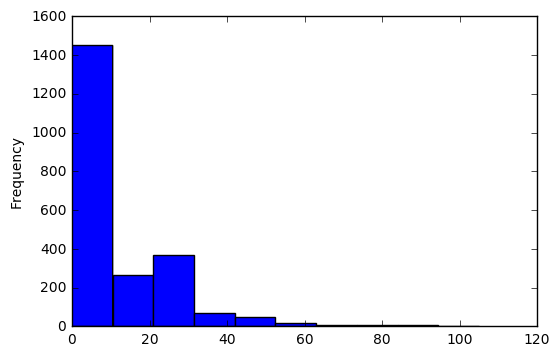

In [313]:
#df94_m[done94]['rel_end_days'].plot(kind='hist')
#plt.show()

# 10/30の受講者別カード別詳細

In [29]:
df10301=pd.read_csv('1030_UserCoursedtl20171214.csv', header=1, parse_dates=True)

In [30]:
#columns94 = ['ログインID', 'カードコード','表示開始日時','受講回（回目）','学習開始日時','学習終了日時','学習時間']

# 1回目の受講に絞り、事務局の人を外す条件
first1030 = df10301['受講回（回目）'] ==1
non_adm1030 = df10301['所属組織'] !='事務局'

# 1回目の受講のDataframeと全ての学習を含めたDataframe
df1030=df10301.loc[:, columns94][(first1030)&(non_adm1030)]
df1030_total=df10301.loc[:, columns94][(non_adm1030)]

# columns の名称変更
df1030.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']
df1030_total.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']

In [31]:
# datetimeの設定
df1030['end'] = pd.to_datetime(df1030['end'])
df1030['start'] = pd.to_datetime(df1030['start'])
df1030['study_time'] = pd.to_datetime(df1030['study_time'])
df1030['study_time'] = df1030['study_time'].dt.hour*3600 + df1030['study_time'].dt.minute*60 + df1030['study_time'].dt.second
df1030['study_time'] = pd.to_numeric(df1030['study_time'])
df1030['release'] = pd.to_datetime(df1030['release'])

df1030_total['end'] = pd.to_datetime(df1030_total['end'])
df1030_total['start'] = pd.to_datetime(df1030_total['start'])
df1030_total['study_time'] = pd.to_datetime(df1030_total['study_time'])
df1030_total['study_time'] = df1030_total['study_time'].dt.hour*3600 + df1030_total['study_time'].dt.minute*60 + df1030_total['study_time'].dt.second
df1030_total['study_time'] = pd.to_numeric(df1030_total['study_time'])
df1030_total['release'] = pd.to_datetime(df1030_total['release'])

# 並び替え
df1030 = df1030[['LOGINID', 'card_code','times','release','start','end','study_time']]
df1030_total = df1030_total[['LOGINID', 'card_code','times','release','start','end','study_time']]

# NaNを前と同じ値になるように修正
df1030.fillna(method='ffill', inplace = True)
df1030_total.fillna(method='ffill', inplace = True)

# リリースからカード修了までの時間
df1030['rel_end_days'] = df1030['end'] - df1030['release']
df1030_total['rel_end_days'] = df1030_total['end'] - df1030_total['release']

df1030['rel_end_days'] = df1030['rel_end_days'].dt.days
df1030_total['rel_end_days'] = df1030_total['rel_end_days'].dt.days

In [32]:
# 7/3からいるメンバーを取ってくる
df_org = pd.read_csv('20170703_original_1.csv')

# columns の名称変更 
df_org.columns = ['LOGINID', 'status']

# データのタイプをstringに統一
df_org['LOGINID'] = df_org['LOGINID'].astype(str)

#確認用
#print(df1.dtypes)
#print(df_org.dtypes)

In [33]:
# df94_2, df94_total2 とdf_orgのマージ
df1030_2 = pd.merge(df1030,df_org, how='left')
df1030_total2 = pd.merge(df1030_total,df_org, how='left')

In [34]:
# statusがm0703の人（7月3日から必須でいる人）を抽出
# ７月３日から必須：df1030_m, 任意：df1030_a
org1030_mand = df1030_2['status'] == 'm0703'
org1030_arb = df1030_2['status'] == '703'
df1030_m = df1030_2.loc[org1030_mand]
df1030_a = df1030_2[org1030_arb]

org1030_totalmand = df1030_total2['status'] == 'm0703'
org1030_totalarb = df1030_total2['status'] == '703'
df1030_totalm = df1030_total2.loc[org1030_totalmand]
df1030_totala = df1030_total2[org1030_totalarb]

In [76]:
# 最後のカード（card_code == 134044） を取ってくる　→maxのカードを取ってくる？
done1030 = df1030_m['card_code'] == 134044
df1030_mdone = df1030_m[done1030]

done1030a = df1030_a['card_code'] == 134044
df1030_adone = df1030_a[done1030a]

# 最後のカードまで辿り着いた人の数
print(len(df1030_mdone.index))
print(len(df1030_adone.index))

2085
320


# 11/13の受講者別カード別詳細

In [65]:
df11131=pd.read_csv('1113_UserCoursedtl_20171222.csv', header=1, parse_dates=True)

In [66]:
#columns94 = ['ログインID', 'カードコード','表示開始日時','受講回（回目）','学習開始日時','学習終了日時','学習時間']

# 1回目の受講に絞り、事務局の人を外す条件
first1113 = df11131['受講回（回目）'] ==1
non_adm1113 = df11131['所属組織'] !='事務局'

# 1回目の受講のDataframeと全ての学習を含めたDataframe
df1113=df11131.loc[:, columns94][(first1113)&(non_adm1113)]
df1113_total=df11131.loc[:, columns94][(non_adm1113)]

# columns の名称変更
df1113.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']
df1113_total.columns = ['LOGINID', 'card_code','release','times','start','end','study_time']

In [67]:
# datetimeの設定
df1113['end'] = pd.to_datetime(df1113['end'])
df1113['start'] = pd.to_datetime(df1113['start'])
df1113['study_time'] = pd.to_datetime(df1113['study_time'])
df1113['study_time'] = df1113['study_time'].dt.hour*3600 + df1113['study_time'].dt.minute*60 + df1113['study_time'].dt.second
df1113['study_time'] = pd.to_numeric(df1113['study_time'])

df1113['release'] = pd.to_datetime(df1113['release'])

df1113_total['end'] = pd.to_datetime(df1113_total['end'])
df1113_total['start'] = pd.to_datetime(df1113_total['start'])
df1113_total['study_time'] = pd.to_datetime(df1113_total['study_time'])
df1113_total['study_time'] = df1113_total['study_time'].dt.hour*3600 + df1113_total['study_time'].dt.minute*60 + df1113_total['study_time'].dt.second
df1113_total['study_time'] = pd.to_numeric(df1113_total['study_time'])
df1113_total['release'] = pd.to_datetime(df1113_total['release'])

# 並び替え
df1113 = df1113[['LOGINID', 'card_code','times','release','start','end','study_time']]
df1113_total = df1113_total[['LOGINID', 'card_code','times','release','start','end','study_time']]

# NaNを前と同じ値になるように修正
df1113.fillna(method='ffill', inplace = True)
df1113_total.fillna(method='ffill', inplace = True)

# リリースからカード修了までの時間
df1113['rel_end_days'] = df1113['end'] - df1113['release']
df1113_total['rel_end_days'] = df1113_total['end'] - df1113_total['release']

df1113['rel_end_days'] = df1113['rel_end_days'].dt.days
df1113_total['rel_end_days'] = df1113_total['rel_end_days'].dt.days

In [68]:
# 7/3からいるメンバーを取ってくる
df_org = pd.read_csv('20170703_original_1.csv')

# columns の名称変更 
df_org.columns = ['LOGINID', 'status']

# データのタイプをstringに統一
df_org['LOGINID'] = df_org['LOGINID'].astype(str)

#確認用
#print(df1.dtypes)
#print(df_org.dtypes)

In [69]:
# df94_2, df94_total2 とdf_orgのマージ
df1113_2 = pd.merge(df1113,df_org, how='left')
df1113_total2 = pd.merge(df1113_total,df_org, how='left')

In [70]:
# statusがm0703の人（7月3日から必須でいる人）を抽出
# ７月３日から必須：df1113_m, 任意：df1113_a
org1113_mand = df1113_2['status'] == 'm0703'
org1113_arb = df1113_2['status'] == '703'
df1113_m = df1113_2.loc[org1113_mand]
df1113_a = df1113_2[org1113_arb]

org1113_totalmand = df1113_total2['status'] == 'm0703'
org1113_totalarb = df1113_total2['status'] == '703'
df1113_totalm = df1113_total2.loc[org1113_totalmand]
df1113_totala = df1113_total2[org1113_totalarb]

In [73]:
# 最後のカード（card_code == 137367） を取ってくる　→maxのカードを取ってくる？
done1113 = df1113_m['card_code'] == 137367
df1113_mdone = df1113_m[done1113]

done1113a = df1113_a['card_code'] == 137367
df1113_adone = df1113_a[done1113a]

# 最後のカードまで辿り着いた人の数
print(len(df1113_mdone.index))
print(len(df1113_adone.index))

2004
306


# ここから分析

In [48]:
# 全体的な修了率
print(len(df_mdone.index)/len(df_m['LOGINID'].unique()))
print(len(df94_mdone.index)/len(df94_m['LOGINID'].unique()))
print(len(df1030_mdone.index)/len(df1030_m['LOGINID'].unique()))
print(len(df1113_mdone.index)/len(df1113_m['LOGINID'].unique()))

0.9995573262505534
0.9959982214317474
0.9793330201972757
0.9862204724409449


In [49]:
# リリースから修了までの時間が7日以内の人を抽出
week = df_mdone['rel_end_days'] < 8
week94 = df94_mdone['rel_end_days'] < 8
week1030 = df1030_mdone['rel_end_days'] < 8
week1113 = df1113_mdone['rel_end_days'] < 8

# リリースから7日以内に修了した人の数と割合
print(len(df_mdone[week]))
print(len(df_mdone[week])/len(df_mdone.index))
print(len(df94_mdone[week94]))
print(len(df94_mdone[week94])/len(df94_mdone.index))
print(len(df1030_mdone[week1030]))
print(len(df1030_mdone[week1030])/len(df1030_mdone.index))
print(len(df1113_mdone[week1113]))
print(len(df1113_mdone[week1113])/len(df1113_mdone.index))

1042
0.46147032772364927
1282
0.5723214285714285
1192
0.5717026378896882
1251
0.624251497005988


In [50]:
# 総学習時間
print(df_totalm.groupby('LOGINID')['study_time'].sum().describe())
print(df94_totalm.groupby('LOGINID')['study_time'].sum().describe())
print(df1030_totalm.groupby('LOGINID')['study_time'].sum().describe())
print(df1113_totalm.groupby('LOGINID')['study_time'].sum().describe())

count    2259.000000
mean     1189.376273
std       816.963132
min        50.000000
25%       666.000000
50%       999.000000
75%      1455.000000
max      6240.000000
Name: study_time, dtype: float64
count     2249.000000
mean      1222.261894
std       1012.426771
min         30.000000
25%        593.000000
50%        944.000000
75%       1489.000000
max      10989.000000
Name: study_time, dtype: float64
count    2129.000000
mean      858.373415
std       838.061736
min        11.000000
25%       332.000000
50%       606.000000
75%      1068.000000
max      6647.000000
Name: study_time, dtype: float64
count     2032.000000
mean       843.345472
std        858.408618
min          8.000000
25%        381.000000
50%        638.500000
75%       1058.250000
max      13475.000000
Name: study_time, dtype: float64


In [51]:
# コース終了までの学習時間
print(df_m.groupby('LOGINID')['study_time'].sum().describe())
print(df94_m.groupby('LOGINID')['study_time'].sum().describe())
print(df1030_m.groupby('LOGINID')['study_time'].sum().describe())
print(df1113_m.groupby('LOGINID')['study_time'].sum().describe())

count    2259.000000
mean     1116.209827
std       747.440224
min        48.000000
25%       635.500000
50%       936.000000
75%      1362.000000
max      5516.000000
Name: study_time, dtype: float64
count    2249.000000
mean     1050.204091
std       814.061860
min        26.000000
25%       553.000000
50%       843.000000
75%      1281.000000
max      7724.000000
Name: study_time, dtype: float64
count    2129.000000
mean      794.697980
std       770.540329
min        11.000000
25%       314.000000
50%       567.000000
75%      1001.000000
max      6223.000000
Name: study_time, dtype: float64
count    2032.000000
mean      730.948819
std       644.148340
min         8.000000
25%       342.750000
50%       566.000000
75%       919.250000
max      7346.000000
Name: study_time, dtype: float64


In [52]:
# リリースから、終了までの日数の分布
print(df_mdone['rel_end_days'].describe())
print(df94_mdone['rel_end_days'].describe())
print(df1030_mdone['rel_end_days'].describe())
print(df1113_mdone['rel_end_days'].describe())

count    2258.000000
mean       17.545173
std        19.861817
min         0.000000
25%         3.000000
50%         9.000000
75%        27.000000
max       110.000000
Name: rel_end_days, dtype: float64
count    2240.000000
mean       11.288839
std        14.177276
min         0.000000
25%         1.000000
50%         6.000000
75%        19.000000
max       105.000000
Name: rel_end_days, dtype: float64
count    2085.000000
mean        9.922782
std        11.252523
min         0.000000
25%         1.000000
50%         7.000000
75%        15.000000
max        45.000000
Name: rel_end_days, dtype: float64
count    2004.000000
mean        8.265968
std         9.545258
min         0.000000
25%         1.000000
50%         4.000000
75%        14.000000
max        39.000000
Name: rel_end_days, dtype: float64


In [54]:
#df_mdone['rel_end_days'].plot(kind='box')
#plt.show()

In [55]:
#df94_mdone['rel_end_days'].plot(kind='box')
#plt.show()

In [56]:
#df1030_mdone['rel_end_days'].plot(kind='box')
#plt.show()

In [53]:
# 復習カードの割合
print(df_totalm['times'][df_totalm['times'] >=2].count()/len(df_totalm.index))
print(df94_totalm['times'][df94_totalm['times'] >=2].count()/len(df94_totalm.index))
print(df1030_totalm['times'][df1030_totalm['times'] >=2].count()/len(df1030_totalm.index))

0.162215628091
0.216700263607
0.170689908437


In [57]:
df94_totalm

,LOGINID,card_code,times,release,start,end,study_time,rel_end_days,status
0,24007,118745,1,2017-09-04 10:00:00,2017-09-05 15:09:00,2017-09-05 15:10:00,46.0,1,m0703
1,24007,118745,2,2017-09-04 10:00:00,2017-09-07 11:20:00,2017-09-07 11:22:00,69.0,3,m0703
2,24007,118745,3,2017-09-04 10:00:00,2017-09-07 14:53:00,2017-09-07 14:53:00,14.0,3,m0703
3,24007,118745,4,2017-09-04 10:00:00,2017-09-07 15:21:00,2017-09-07 15:21:00,10.0,3,m0703
4,24007,118745,5,2017-09-04 10:00:00,2017-09-12 14:10:00,2017-09-12 14:11:00,12.0,8,m0703
5,24007,118745,6,2017-09-04 10:00:00,2017-09-12 14:28:00,2017-09-12 14:28:00,5.0,8,m0703
6,24007,118745,7,2017-09-04 10:00:00,2017-09-13 13:00:00,2017-09-13 13:01:00,79.0,9,m0703
7,24007,118745,8,2017-09-04 10:00:00,2017-09-14 14:27:00,2017-09-14 14:27:00,8.0,10,m0703
8,24007,118745,9,2017-09-04 10:00:00,2017-09-19 13:41:00,2017-09-19 13:41:00,10.0,15,m0703
9,24007,118745,10,2017-09-04 10:00:00,2017-09-22 10:48:00,2017-09-22 10:48:00,7.0,18,m0703


In [82]:
# 任意でログインしている人の人数とその内の修了率
print(len(df_a['LOGINID'].unique()))
print(len(df_adone.index)/len(df_a['LOGINID'].unique()))
print(len(df94_a['LOGINID'].unique()))
print(len(df94_adone.index)/len(df94_a['LOGINID'].unique()))
print(len(df1030_a['LOGINID'].unique()))
print(len(df1030_adone.index)/len(df1030_a['LOGINID'].unique()))
print(len(df1113_a['LOGINID'].unique()))
print(len(df1113_adone.index)/len(df1113_a['LOGINID'].unique()))

362
0.9530386740331491
304
0.9835526315789473
331
0.9667673716012085
313
0.9776357827476039


In [83]:
# リリースから修了までの時間が7日以内の人を抽出
weeka = df_adone['rel_end_days'] < 8
week94a = df94_adone['rel_end_days'] < 8
week1030a = df1030_adone['rel_end_days'] < 8
week1113a = df1113_adone['rel_end_days'] < 8

# リリースから7日以内に修了した人の数と割合
print(len(df_adone[weeka]))
print(len(df_adone[weeka])/len(df_adone.index))
print(len(df94_adone[week94a]))
print(len(df94_adone[week94a])/len(df94_adone.index))
print(len(df1030_adone[week1030a]))
print(len(df1030_adone[week1030a])/len(df1030_adone.index))
print(len(df1113_adone[week1113a]))
print(len(df1113_adone[week1113a])/len(df1113_adone.index))

147
0.4260869565217391
173
0.5785953177257525
187
0.584375
212
0.6928104575163399
